In [12]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#606c38",  # dark-moss-green
    "#283618",  # pakistan-green
    "#fefae0",  # cornsilk
    "#dda15e",  # earth-yellow
    "#bc6c25",  # tigers-eye
]

cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)


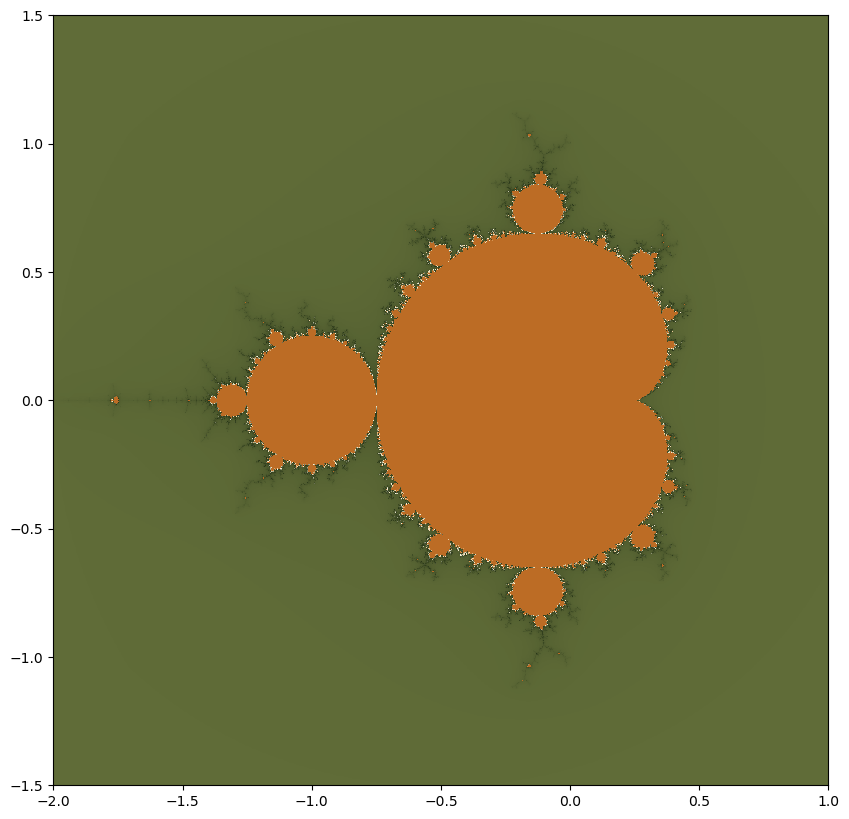

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import matplotlib.patches as patches

plt.ion()

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

class MandelbrotViewer:
    def __init__(self, xmin, xmax, ymin, ymax, width=10, height=10, max_iter=256):
        self.xmin, self.xmax = xmin, xmax
        self.ymin, self.ymax = ymin, ymax
        self.width, self.height = width, height
        self.max_iter = max_iter
        self.fig, self.ax = plt.subplots(figsize=(width, height))
        self.ax.set_xlim(self.xmin, self.xmax)
        self.ax.set_ylim(self.ymin, self.ymax)
        self.rectangle_selector = RectangleSelector(self.ax, self.on_select, useblit=True,
                                                     button=[1], minspanx=5, minspany=5, spancoords='pixels',
                                                     interactive=True)
        self.draw_fractal()

    def draw_fractal(self):
        x, y, z = mandelbrot_set(self.xmin, self.xmax, self.ymin, self.ymax, self.width*100, self.height*100, self.max_iter)
        self.ax.clear()
        self.ax.set_xlim(self.xmin, self.xmax)
        self.ax.set_ylim(self.ymin, self.ymax)
        self.ax.pcolormesh(x, y, z.T, cmap=cmap, shading='auto')
        self.rectangle_selector.set_active(True)

    def on_select(self, eclick, erelease):
        'eclick and erelease are matplotlib events at press and release'
        self.xmin, self.xmax = sorted([eclick.xdata, erelease.xdata])
        self.ymin, self.ymax = sorted([eclick.ydata, erelease.ydata])
        self.draw_fractal()

xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
viewer = MandelbrotViewer(xmin, xmax, ymin, ymax)


In [64]:
from numpy import random
import numpy as np
import time

start_time = time.time()

def calculate_area(xmin, xmax, ymin, ymax, z, max_iter):
    in_set = z == max_iter
    proportion = np.sum(in_set) / z.size
    return proportion * (xmax - xmin) * (ymax - ymin)

def random_sampling(xmin, xmax, ymin, ymax, n_samples, max_iter=256):
    rng = random.default_rng()
    x_samples = rng.random(n_samples) * (xmax - xmin) + xmin
    y_samples = rng.random(n_samples) * (ymax - ymin) + ymin
    z = np.empty(n_samples)
    for i in range(n_samples):
        x = x_samples[i]
        y = y_samples[i]
        z[i] = mandelbrot(x + 1j*y, max_iter)
    area = calculate_area(xmin, xmax, ymin, ymax, z, max_iter)
    return area

area_random = random_sampling(-2.0, 1.0, -1.5, 1.5, 1000)
print(f'The Mandelbrot set area with random sampling is {area_random}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for random sampling: {elapsed_time} seconds")

start_time = time.time()

import lhsmdu 

def latin_sampling(xmin, xmax, ymin, ymax, n_samples, max_iter=256):
    a = lhsmdu.sample(2,n_samples) 
    b = np.ravel(a[0])
    c = np.ravel(a[1])
    x_samples = b*(xmax - xmin) + xmin 
    y_samples = c*(ymax - ymin) + ymin
    z = np.empty(n_samples)
    for i in range(n_samples):
        x = x_samples[i]
        y = y_samples[i]
        z[i] = mandelbrot(x + 1j*y, max_iter)
    area = calculate_area(xmin, xmax, ymin, ymax, z, max_iter)
    return area

area_latin = latin_sampling(-2.0, 1.0, -1.5, 1.5, 1000)
print(f'The Mandelbrot set area with Latin hypercube sampling is {area_latin}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for Latin hypercube sampling: {elapsed_time} seconds")

    

The Mandelbrot area with random sampling is 1.526274
Elapsed time for random sampling: 3.2664942741394043 seconds
The Mandelbrot area with random sampling is 1.5749999999999997
Elapsed time for Latin hypercube sampling: 532.7029418945312 seconds


In [78]:
def orthogonal_sampling(xmin, xmax, ymin, ymax, n_samples, max_iter=256):
    x_samples = lhsmdu.sample(1, n_samples).flatten() * (xmax - xmin) + xmin
    y_samples = lhsmdu.sample(1, n_samples).flatten() * (ymax - ymin) + ymin
    x_s = np.ravel(x_samples)
    y_s = np.ravel(y_samples)
    z = np.empty(n_samples)
    for i in range(n_samples):
        x = x_s[i]
        y = y_s[i]
        z[i] = mandelbrot(x + 1j*y, max_iter)
    
    area = calculate_area(xmin, xmax, ymin, ymax, z, max_iter)
    return area

start_time = time.time()
area_orthogonal = orthogonal_sampling(-2.0, 1.0, -1.5, 1.5, 400)
print(f'The Mandelbrot set area with orthogonal_sampling sampling is {area_orthogonal}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for Orthogonal sampling: {elapsed_time} seconds")

The Mandelbrot set area with orthogonal_sampling sampling is 1.6649999999999998
Elapsed time for Orthogonal sampling: 79.67795372009277 seconds
